In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [19]:
data=pd.read_csv(r'C:\Users\libin\OneDrive\Desktop\UMAV PROJECTS\PROJECT 10\Heart Disease data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [20]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Attribute Information

age : The person's age in Years

sex : The person's Gender ( 1 = male, 2 = female)

cp (chest pain type) : The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps : The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's serum cholestoral in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)
exercise induced angina

oldpeak: ST depression induced by exercise relative to rest


slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target: Heart disease (0 = no, 1 = yes)

In [21]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is NO MISSING Values in our Dataset

# Percentage of people having Heart Disease

In [22]:
target = data.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [23]:
#Numerical Data into Categorical Data Conversion

def heart_disease(row):
    if row==0:
        return 'NO'
    elif row==1:
        return 'YES'

In [24]:
data['Heart_Disease']=data['target'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO


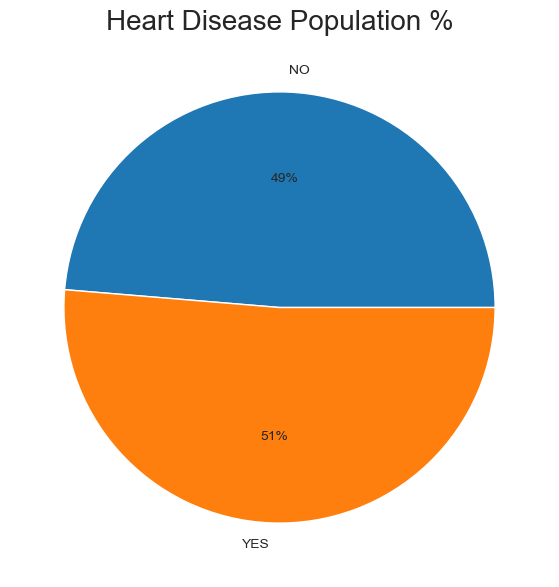

In [25]:
#Pie Chart for People having Heart Disease
plt.figure(figsize=(10,7))
plt.pie(target, labels=['NO','YES'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

From the overall population, people having heart disease (51%) are greater than those who have heart disease(49%)

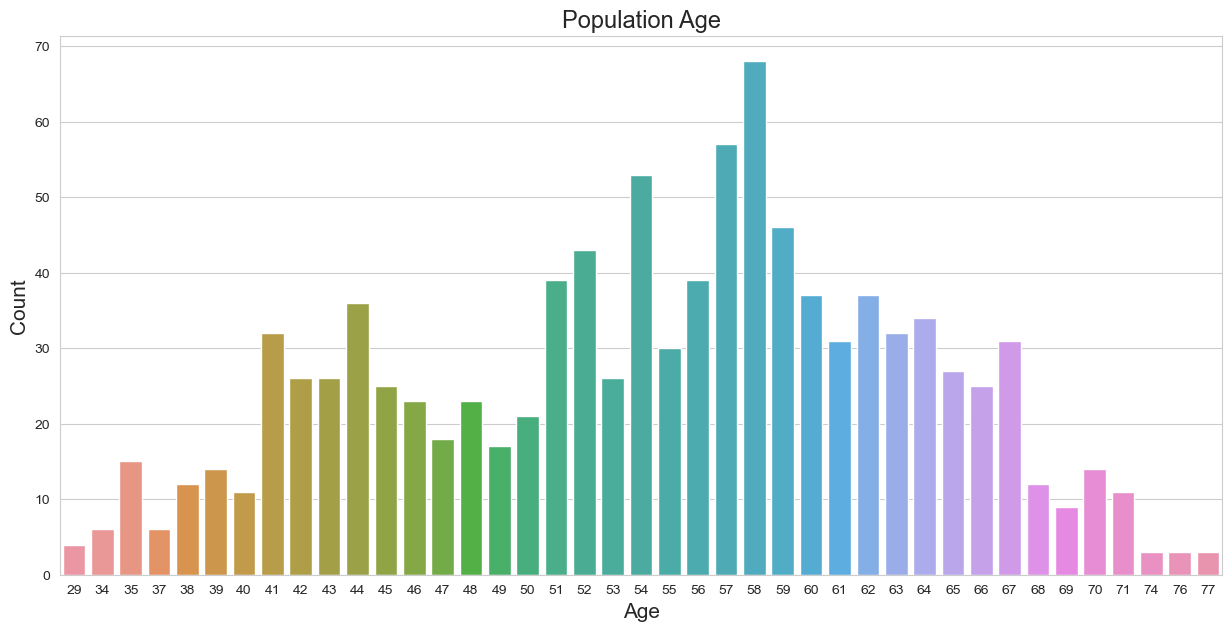

In [26]:

#Countplot based on Person's Age

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

-> In this section, the best analysis can be divided into the elderly,middle-aged, young people by looking at the age ranges.

In [29]:
#Statistical Analysis
Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [34]:
#Categorical Analysis

Young_Ages=data[(data['age']>=20) & (data['age']<35)]
Middle_Ages=data[(data['age']>=35) & (data['age']<50)]
Elderly_Ages=data[(data['age']>50)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 10
Middle Ages = 284
Elderly Ages = 710


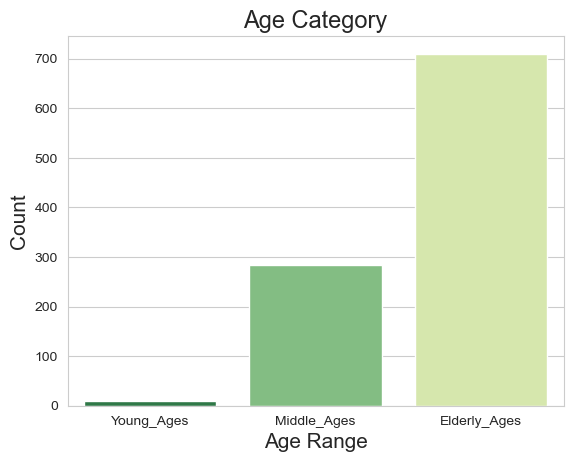

In [35]:
#Bar Plot Creation of Age Category 

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [36]:
#Categorical Analysis

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [37]:
#Applying converted data into our dataset with new column - sex1

data['Gender']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female


In [42]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=20 and row<35:
        return 'Young Aged'
    elif row>=35 and row<50:
        return 'Middle Aged'
    elif row>50:
        return 'Elder Aged'
    
data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Elder Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Elder Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Aged


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


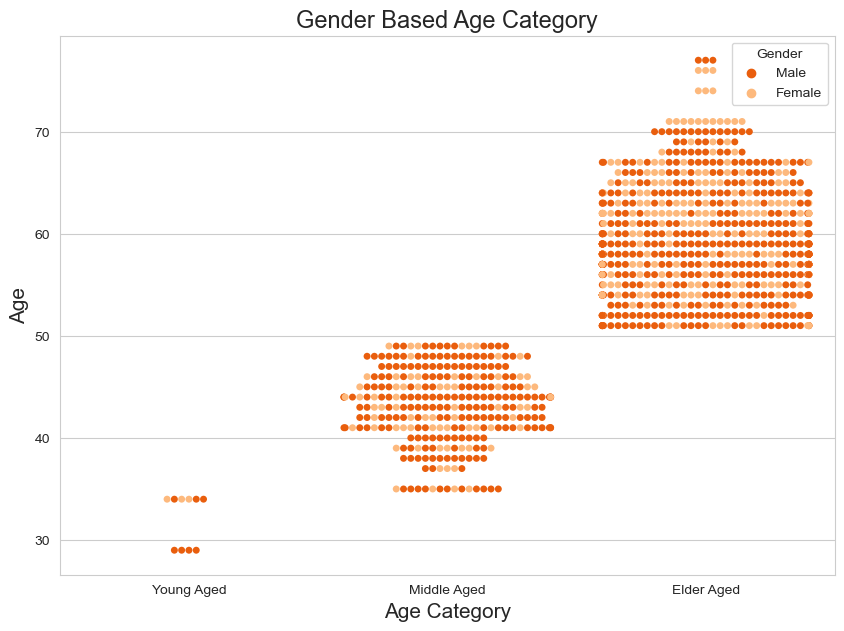

In [46]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='Gender', data=data, order=['Young Aged','Middle Aged','Elder Aged'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

-> In Our Population Number Of Males are more in Middle Age Category and Females are more in Elder Age Category

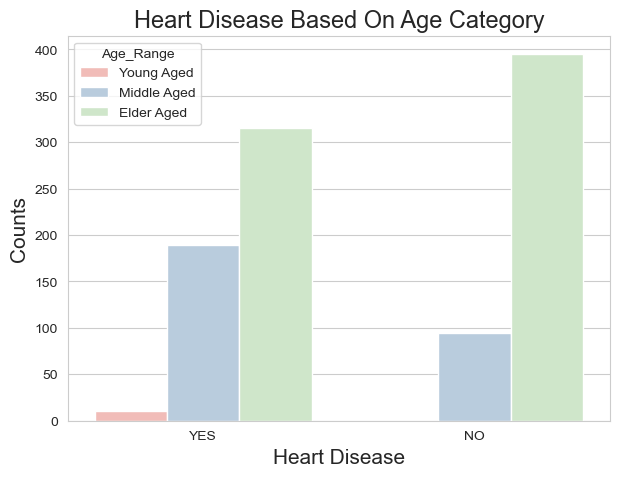

In [47]:
#Count Plot for Heart Disease Based On Age Category 
plt.figure(figsize=(7,5))
hue_order=['Young Aged', 'Middle Aged', 'Elder Aged']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['YES','NO'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

-> Elder Age People are most affected by Heart Disease and Middle Age People are mostly free from any kind of Heart Disease


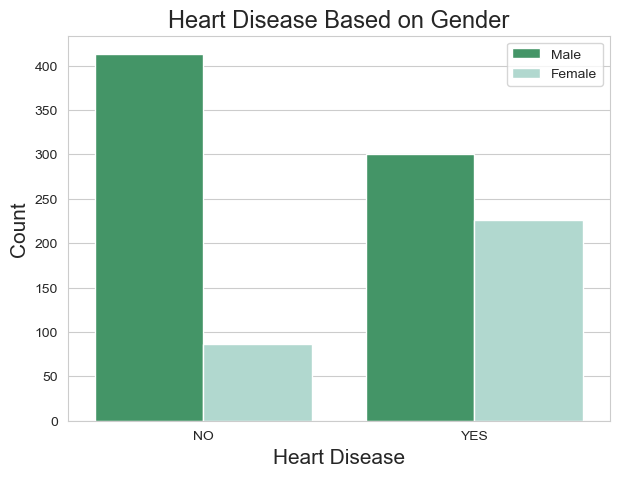

In [48]:
#Count Plot Creation of Heart Disease Based on Gender

plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='Gender', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

-> We can see that Males are mostly tend to have Heart Disease

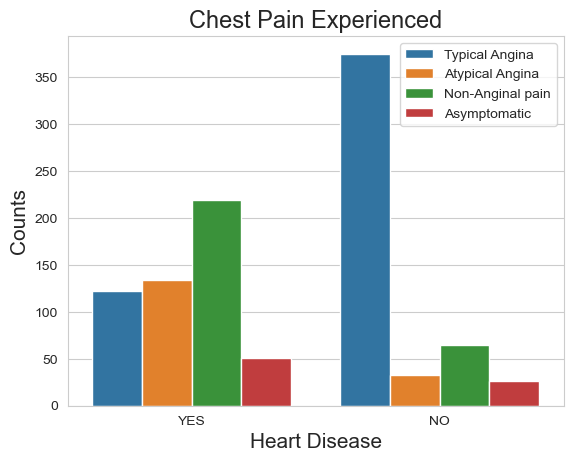

In [50]:
#Count Plot Creation of Chest Pain Experienced 

sns.countplot(x=data['Heart_Disease'], hue='cp', data=data, order=['YES','NO'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()


-> It seems people having Non-Anginal chest pain have a higher chance of heart disease

-> Typical Angina Chest pain means neither causing nor exhibiting symptoms of Heart disease.


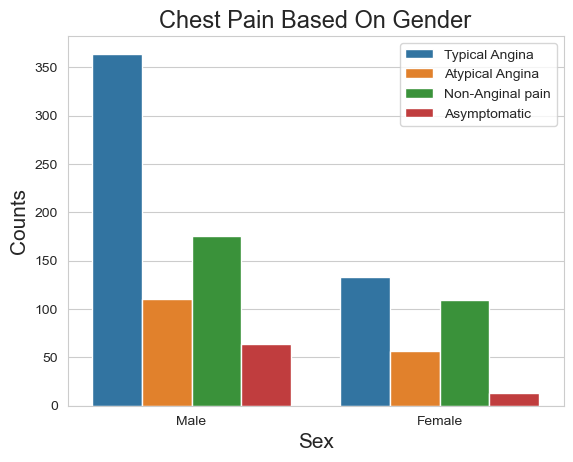

In [51]:
#Count Plot Creation of Chest Pain Based On Gender

sns.countplot(x=data['Gender'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

-> We can see that a higher number of men are suffering from Typical Angina type of Chest Pain

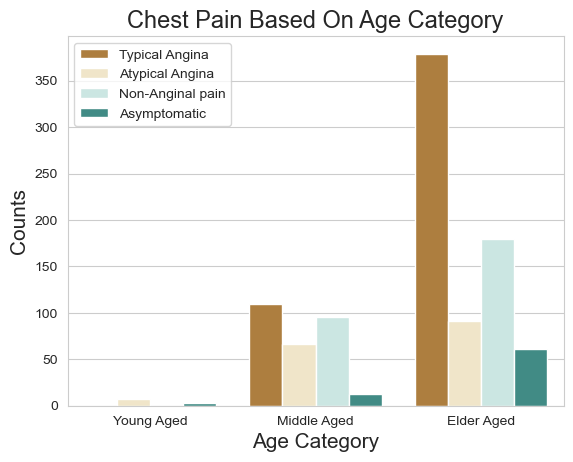

In [52]:
#Count Plot Creation of Chest Pain Based On Age Category 
sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Aged', 'Middle Aged', 'Elder Aged'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

-> There is very high number of Typical Angina Pain in Elderly aged and Middle Aged Category

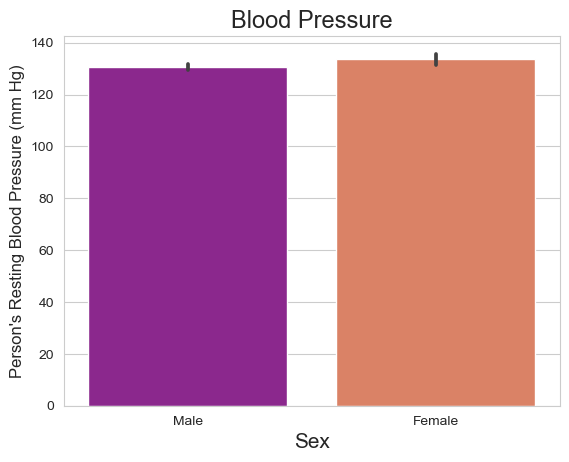

In [53]:
#Bar Plot Creation of Person's Resting Blood Pressure 
sns.barplot(x='Gender', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

-> Blood Pressure Rate is almost equal in Males and Females

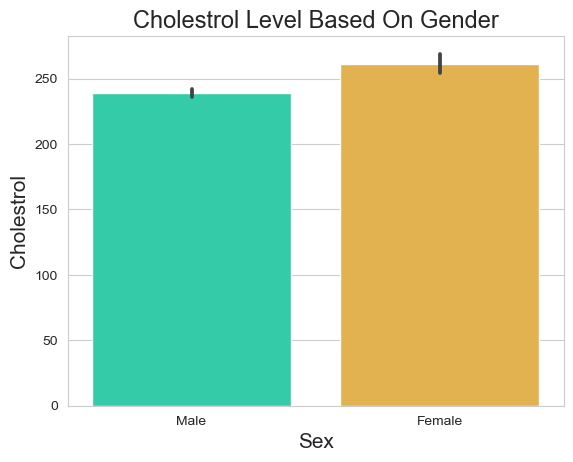

In [55]:
#Bar Plot Creation of Cholestrol Level Based On Gender 
sns.barplot(x='Gender', y='chol', data=data, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

-> females have little bit of higher cholesterol than males

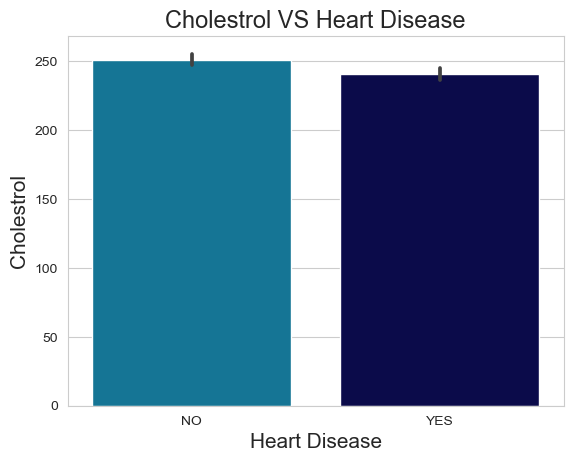

In [56]:
#Bar Plot Creation of Cholestrol VS Heart Disease

sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

-> Higher Cholestrol Level causes Chances Of Heart Disease

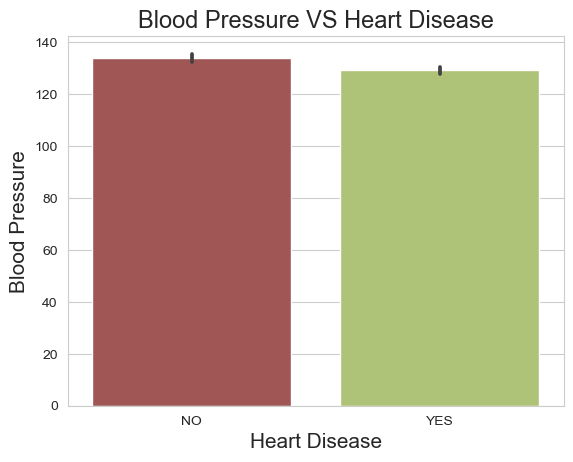

In [57]:
#Bar Plot Creation of Blood Pressure VS Heart Disease 
sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

-> Higher Blood Pressure Level results Chances Of Heart Disease

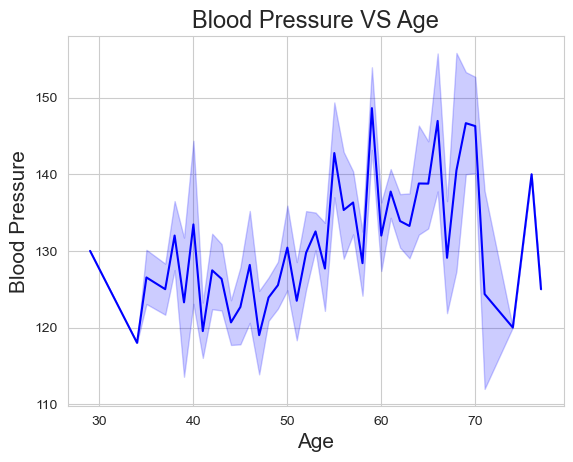

In [59]:
#Line Plot Creation of Blood Pressure VS Age 
sns.lineplot(x='age', y='trestbps', data=data, color='b')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

-> Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70

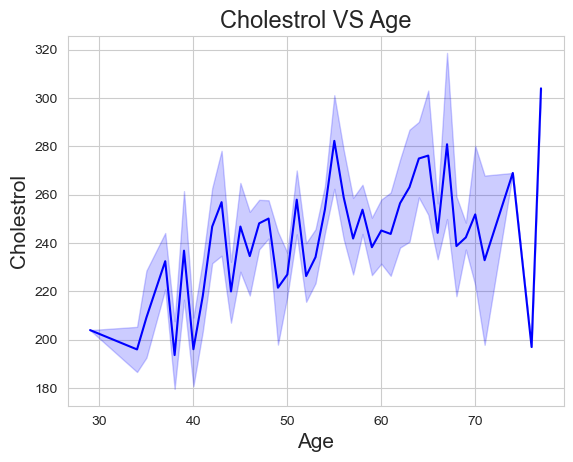

In [60]:
#Line Plot Creation of Cholestrol VS Age 

sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

> Similarly Cholestrol Increasing in the age group of 40-60

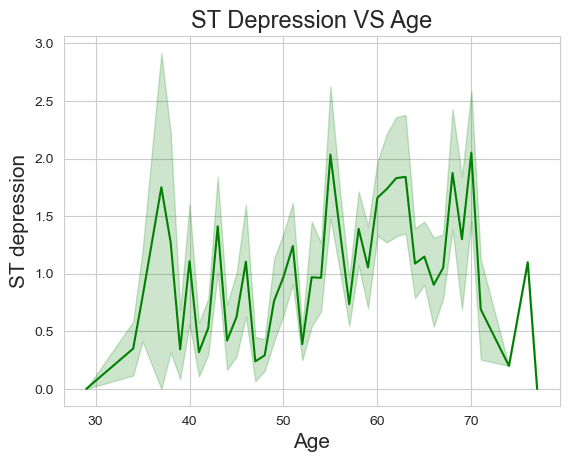

In [62]:
#Line Plot Creation of ST Depression VS Age 

sns.lineplot(x='age', y='oldpeak', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()


-> we can observe from here that ST depression mostly increases bw the age group of 30-40
-> ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

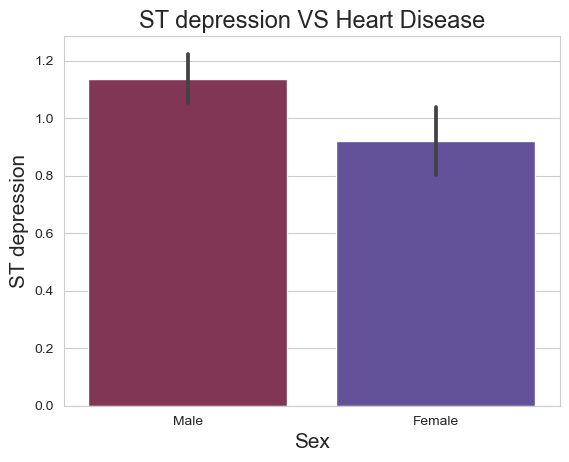

In [63]:
#Bar Plot Creation of ST depression VS Heart Disease 
sns.barplot(x='Gender', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

-> More Males are prone to ST depression as compare to females

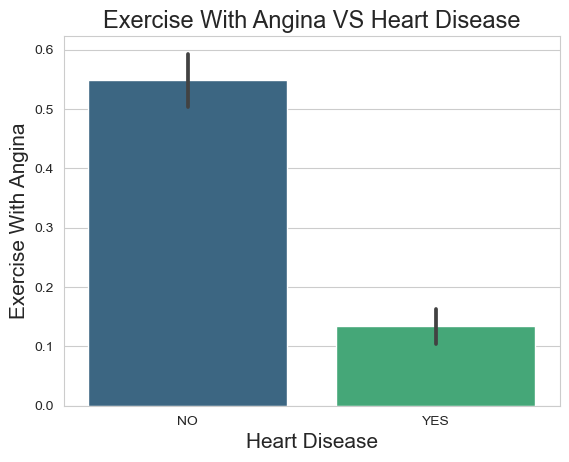

In [64]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease

sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

-> If you suffer from Angina, you may be concerned that exercise but seems like it will not make your symptoms worse.


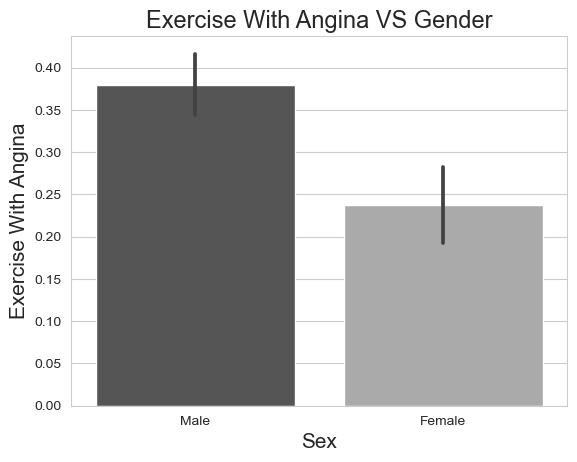

In [65]:
#Bar Plot Creation of Exercise With Angina VS Gender 

sns.barplot(x='Gender', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

-> Males do Exercise when having Angina


-> Angina - A type of chest pain caused by reduced blood flow to the heart.

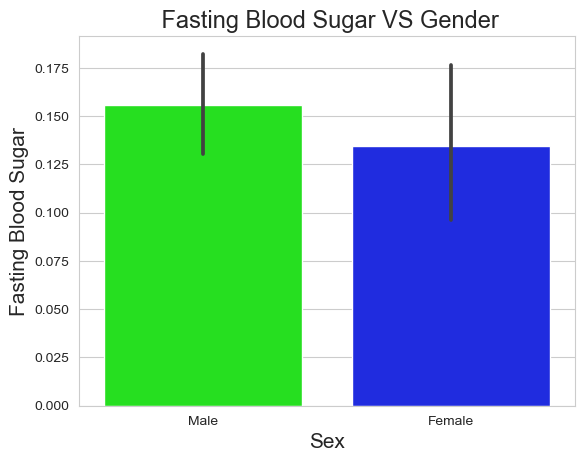

In [66]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender 
sns.barplot(y='fbs', x='Gender', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

-> Males have high number of Fasting Blood Sugar over 120

In [70]:
num_col = data.select_dtypes(include=np.number)
num_col.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.306450,-0.431198,-0.672251,43.085733,102.890625,0.392164,-0.635490,-81.446089,0.378144,2.218825,-0.947742,2.539458,0.407093,-1.040392
sex,-0.431198,0.211944,-0.019491,-0.636863,-4.708984,0.004465,-0.013395,-0.522838,0.030288,0.045812,-0.007584,0.053021,0.056697,-0.064346
cp,-0.672251,-0.019491,1.060160,0.688565,-4.336914,0.029108,0.023687,7.268296,-0.195451,-0.211407,0.083727,-0.187017,-0.104385,0.223903
trestbps,43.085733,-0.636863,0.688565,306.835410,115.657227,1.135165,-1.144685,-15.822822,0.506798,3.857971,-1.303344,1.887842,0.644446,-1.215584
chol,102.890625,-4.708984,-4.336914,115.657227,2661.787109,0.495117,-4.014648,-25.841797,1.643555,3.933301,-0.454102,3.949219,3.209961,-2.579102
fbs,0.392164,0.004465,0.029108,1.135165,0.495117,0.127111,-0.019583,-0.072719,0.008303,0.004549,-0.013634,0.050406,-0.009333,-0.007339
restecg,-0.635490,-0.013395,0.023687,-1.144685,-4.014648,-0.019583,0.278655,0.587909,-0.016373,-0.031085,0.028073,-0.042482,-0.006718,0.035496
thalach,-81.446089,-0.522838,7.268296,-15.822822,-25.841797,-0.072719,0.587909,529.263325,-4.136114,-9.456022,5.618078,-4.929917,-1.400290,4.865194
exang,0.378144,0.030288,-0.195451,0.506798,1.643555,0.008303,-0.016373,-4.136114,0.223514,0.172684,-0.078077,0.052558,0.057865,-0.103558
oldpeak,2.218825,0.045812,-0.211407,3.857971,3.933301,0.004549,-0.031085,-9.456022,0.172684,1.380750,-0.417527,0.268673,0.147810,-0.257632


<Axes: >

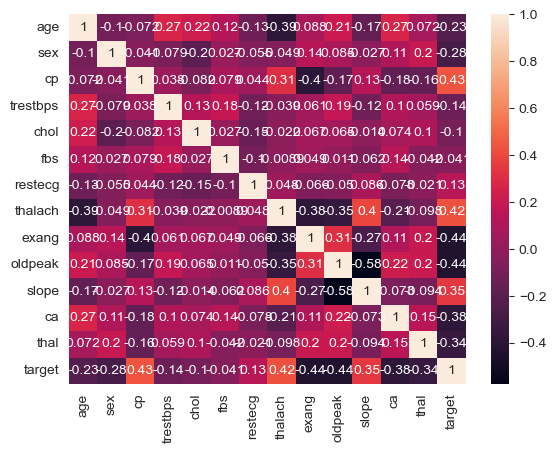

In [72]:
sns.heatmap(num_col.corr(),annot=True)